In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.misc
import skimage.transform

In [23]:
def display_image(img):
    plt.figure()
    plt.imshow(img)
    plt.show()


def _load_raw_image(path):
    img = np.array(scipy.ndimage.imread(path, flatten=False))
    # np_image = scipy.misc.imresize(img, size=(512, 512)) / 255
    np_image = skimage.transform.resize(img, output_shape=(224, 224))
    return np_image

def _l2_image_error(base_img, target_img):
    return np.linalg.norm(base_img - target_img) / np.linalg.norm(base_img)

def _cos_sim(img1, img2):
    dot_product = np.sum(np.multiply(img1, img2))
    norm_1 = np.linalg.norm(img1)
    norm_2 = np.linalg.norm(img2)
    return dot_product / (norm_1 * norm_2)

def cos_sim(img1, img2):
    img1 = _load_raw_image(img1)
    img2 = _load_raw_image(img2)
    # return _l2_image_error(base_img=img1, target_img=img2)
    return _cos_sim(img1, img2)

/home/foobar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/home/foobar/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


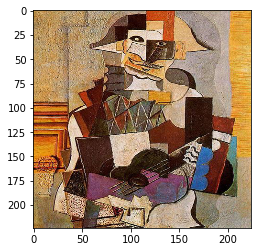

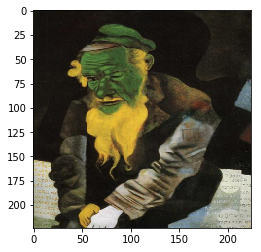

0.6266491661847502


In [24]:
img1_path = "../production_images/5.jpg"
img2_path = "../production_images/7.jpg"
test_load1 = _load_raw_image(img1_path)
display_image(test_load1)

test_load2 = _load_raw_image(img2_path)
display_image(test_load2)

print(cos_sim(img1_path, img2_path))

In [28]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = img1_path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)